In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
data = pd.read_csv('demand_monthly.csv')
data = data.iloc[:,1:]
data.head()

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Month,Demand,Color_Base,Color_Finish,Is_Multicolor,OpticalOrSun,BrandName
0,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,2023-09,26.0,black,shiny,0.0,Sun,Calvin Klein
1,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,2023-10,28.0,black,shiny,0.0,Sun,Calvin Klein
2,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,2023-11,27.0,black,shiny,0.0,Sun,Calvin Klein
3,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,2023-12,26.0,black,shiny,0.0,Sun,Calvin Klein
4,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,2024-01,9.0,black,shiny,0.0,Sun,Calvin Klein


In [133]:
data['Date'] = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)

In [134]:
#seasonality

summer = []
holiday_season = []
insurance_reset = []

for i in range(len(data)):
    if data.loc[i,'Date'].month >= 6 and data.loc[i,'Date'].month <= 8:
        summer.append(1)
    else:
        summer.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 11 or data.loc[i,'Date'].month == 12:
        holiday_season.append(1)
    else:
        holiday_season.append(0)
        
for i in range(len(data)):
    if data.loc[i,'Date'].month == 1:
        insurance_reset.append(1)
    else:
        insurance_reset.append(0)
        
data['is_summer'] = summer
data['is_holiday_season'] = holiday_season
data['is_insurance_reset'] = insurance_reset

In [135]:
trends = pd.read_csv('opticalsun_googletrends.csv')
trends['Date'] = pd.to_datetime(trends['Time'])
trends.drop(columns='Time',inplace=True)
trends.head()

,Glasses,Sunglasses,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change,Date
0,43,17,NaN,NaN,-4.65%,23.53%,2023-01-01
1,41,21,NaN,NaN,7.32%,9.52%,2023-02-01
2,44,23,NaN,NaN,-4.55%,13.04%,2023-03-01
3,42,26,43.0,20.0,-2.38%,19.23%,2023-04-01
4,41,31,42.0,23.0,4.88%,9.68%,2023-05-01


In [136]:
data = data.merge(trends[['Date','Glasses_3m_avg','Sunglasses_3m_avg','Glasses_pct_change','Sunglasses_pct_change']],on='Date',how='left')
data.head()

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Demand,...,OpticalOrSun,BrandName,Date,is_summer,is_holiday_season,is_insurance_reset,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change
0,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,26.0,...,Sun,Calvin Klein,2023-09-01,0,0,0,41.0,31.0,20.00%,-20.83%
1,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,28.0,...,Sun,Calvin Klein,2023-10-01,0,0,0,40.0,27.0,-10.42%,0.00%
2,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,27.0,...,Sun,Calvin Klein,2023-11-01,0,1,0,42.0,23.0,6.98%,0.00%
3,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,26.0,...,Sun,Calvin Klein,2023-12-01,0,1,0,44.0,21.0,2.17%,-15.79%
4,KC,CALVIN KLEIN SUN,45073,CK20541S,5719001,CK20541S/57/BLACK,AMER,57,BLACK,9.0,...,Sun,Calvin Klein,2024-01-01,0,0,1,46.0,19.0,2.13%,18.75%


In [137]:
data_4m_demand = data.sort_values(['Region','GridValue','Date'])
data_4m_demand['4m_demand'] = (data.groupby(['Region','GridValue']))['Demand'].transform(lambda x: x.shift(-1).iloc[::-1].rolling(4).sum().iloc[::-1])
data_4m_demand.head(15)

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Demand,...,BrandName,Date,is_summer,is_holiday_season,is_insurance_reset,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change,4m_demand
7092,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,...,Nike,2023-09-01,0,0,0,41.0,31.0,20.00%,-20.83%,22.0
7093,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,...,Nike,2023-10-01,0,0,0,40.0,27.0,-10.42%,0.00%,18.0
7094,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,...,Nike,2023-11-01,0,1,0,42.0,23.0,6.98%,0.00%,23.0
7095,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,...,Nike,2023-12-01,0,1,0,44.0,21.0,2.17%,-15.79%,32.0
7096,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,...,Nike,2024-01-01,0,0,1,46.0,19.0,2.13%,18.75%,32.0
7097,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,...,Nike,2024-02-01,0,0,0,45.0,18.0,12.50%,31.58%,36.0
7098,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,7.0,...,Nike,2024-03-01,0,0,0,47.0,18.0,85.19%,24.00%,32.0
7099,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,11.0,...,Nike,2024-04-01,0,0,0,50.0,20.0,-55.00%,-3.23%,25.0
7100,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,...,Nike,2024-05-01,0,0,0,67.0,25.0,4.44%,6.67%,NaN
7101,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,...,Nike,2024-06-01,1,0,0,66.0,29.0,-2.13%,-9.38%,NaN


In [138]:
data_4m_demand.dropna(subset=['4m_demand'],inplace=True) #drop months without 4m demand because we are unable to use them during modeling
data_4m_demand.head(15)

,Collection,BrandLine,Material,StyleCode,GridValue,Style,Region,Size,Color,Demand,...,BrandName,Date,is_summer,is_holiday_season,is_insurance_reset,Glasses_3m_avg,Sunglasses_3m_avg,Glasses_pct_change,Sunglasses_pct_change,4m_demand
7092,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,...,Nike,2023-09-01,0,0,0,41.0,31.0,20.00%,-20.83%,22.0
7093,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,10.0,...,Nike,2023-10-01,0,0,0,40.0,27.0,-10.42%,0.00%,18.0
7094,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,...,Nike,2023-11-01,0,1,0,42.0,23.0,6.98%,0.00%,23.0
7095,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,2.0,...,Nike,2023-12-01,0,1,0,44.0,21.0,2.17%,-15.79%,32.0
7096,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,8.0,...,Nike,2024-01-01,0,0,1,46.0,19.0,2.13%,18.75%,32.0
7097,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,6.0,...,Nike,2024-02-01,0,0,0,45.0,18.0,12.50%,31.58%,36.0
7098,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,7.0,...,Nike,2024-03-01,0,0,0,47.0,18.0,85.19%,24.00%,32.0
7099,KO,NIKE OPTICAL,NKRXCLIPIII,NIKE RX CLIP III VIC,4520900,NIKE RX CLIP III VIC,AMER,Unknown,NaN,11.0,...,Nike,2024-04-01,0,0,0,50.0,20.0,-55.00%,-3.23%,25.0
5184,KO,NIKE OPTICAL,NK5059,NIKE 5059,4615008,NIKE 5059/46/BLACK/T,AMER,46,BLACK/T,0.0,...,Nike,2023-09-01,0,0,0,41.0,31.0,20.00%,-20.83%,0.0
5185,KO,NIKE OPTICAL,NK5059,NIKE 5059,4615008,NIKE 5059/46/BLACK/T,AMER,46,BLACK/T,0.0,...,Nike,2023-10-01,0,0,0,40.0,27.0,-10.42%,0.00%,0.0


In [144]:
data_4m_demand.columns

Index(['Collection', 'BrandLine', 'Material', 'StyleCode', 'GridValue',
       'Style', 'Region', 'Size', 'Color', 'Demand', 'Color_Base',
       'Color_Finish', 'Is_Multicolor', 'OpticalOrSun', 'BrandName', 'Date',
       'is_summer', 'is_holiday_season', 'is_insurance_reset',
       'Glasses_3m_avg', 'Sunglasses_3m_avg', 'Glasses_pct_change',
       'Sunglasses_pct_change', '4m_demand'],
      dtype='object')

**Visualization**

Text(0.5, 1.0, 'Eyewear Average Demand by Brand')

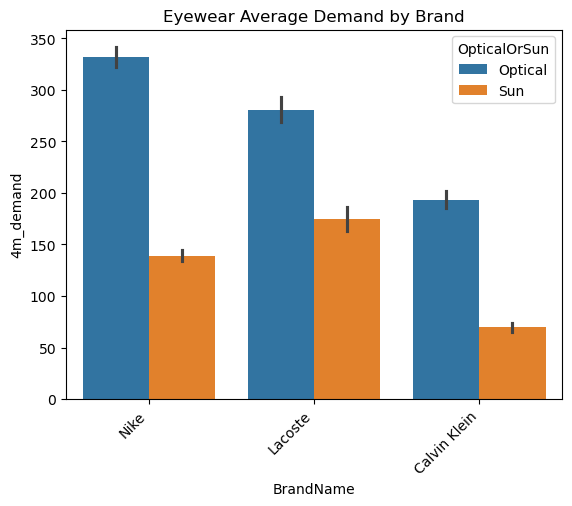

In [ ]:
sns.barplot(data_4m_demand,x='BrandName',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Brand')

Text(0.5, 1.0, 'Eyewear Average Demand by Time')

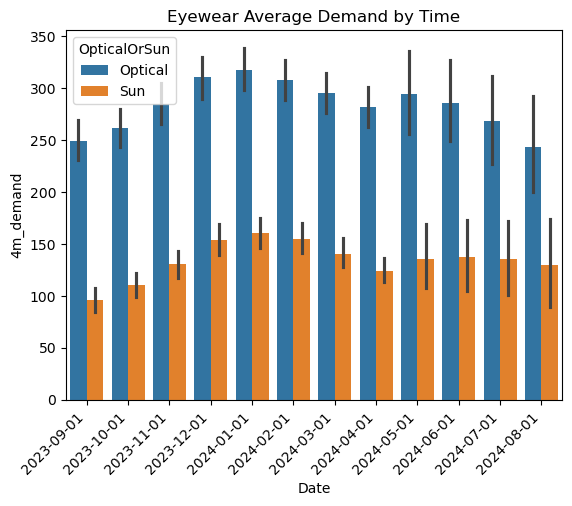

In [ ]:
sns.barplot(data_4m_demand,x='Date',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Time')

Text(0.5, 1.0, 'Average Demand by Summer')

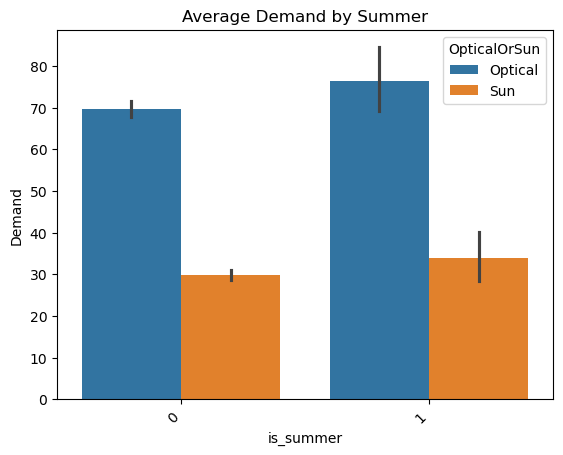

In [ ]:
sns.barplot(data_4m_demand,x='is_summer',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Summer')

Text(0.5, 1.0, 'Average Demand by Insurance Reset')

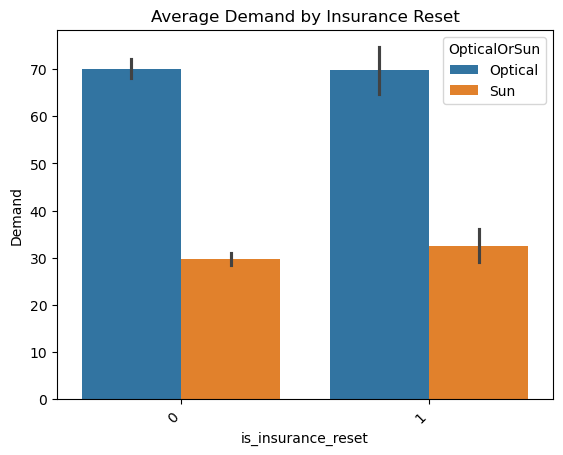

In [ ]:
sns.barplot(data_4m_demand,x='is_insurance_reset',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Insurance Reset')

Text(0.5, 1.0, 'Average Demand by Holdiays')

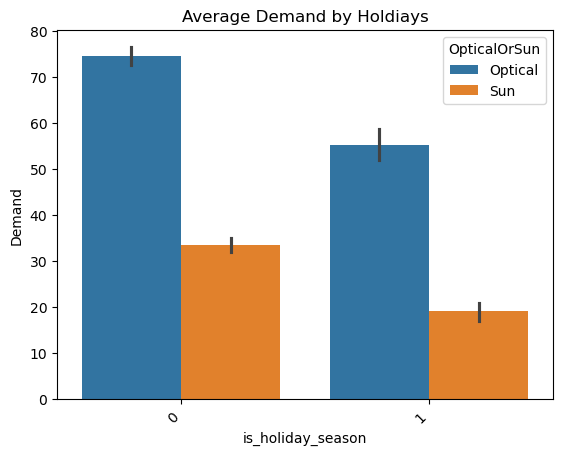

In [ ]:
sns.barplot(data_4m_demand,x='is_holiday_season',y='Demand',hue='OpticalOrSun',estimator='mean')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Holdiays')

Text(0.5, 1.0, 'Average Demand by Color')

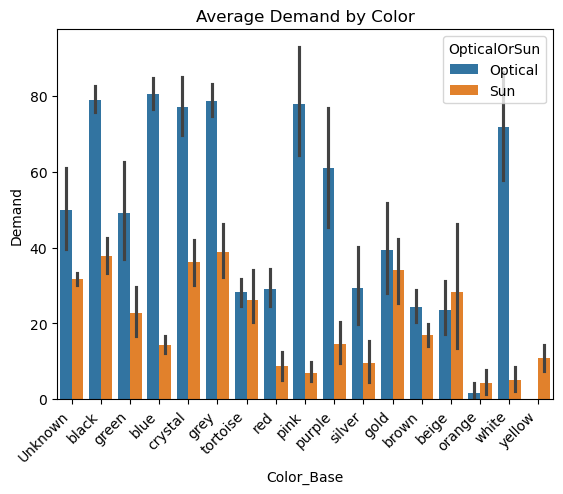

In [ ]:
sns.barplot(data_4m_demand,x='Color_Base',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Color')

Text(0.5, 1.0, 'Eyewear Average Demand by Color')

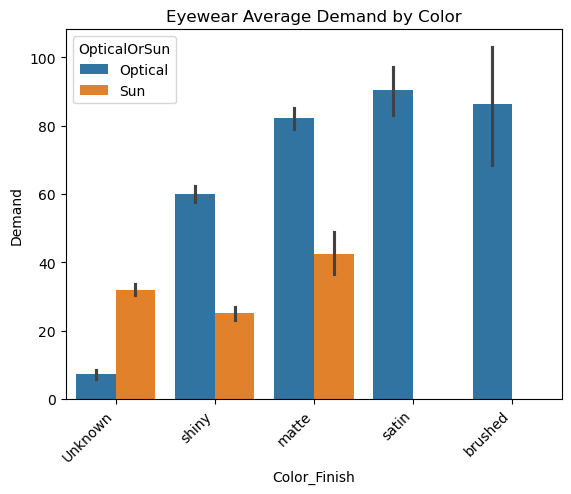

In [152]:
sns.barplot(data_4m_demand,x='Color_Finish',y='Demand',estimator='mean',hue='OpticalOrSun')
plt.xticks(rotation=45, ha='right')
plt.title('Eyewear Average Demand by Color')